In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:/Users/wjssm/Desktop/kaggle/Elo_Merchant_Category_Recommendation/data/train.csv')
test = pd.read_csv('C:/Users/wjssm/Desktop/kaggle/Elo_Merchant_Category_Recommendation/data/test.csv')

In [3]:
print('train_shape : ',train.shape, 'test_shape : ',test.shape)

train_shape :  (201917, 6) test_shape :  (123623, 5)


In [4]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [8]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [9]:
test.describe()

,feature_1,feature_2,feature_3
count,123623.00000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377
std,1.18911,0.749195,0.495840
min,1.00000,1.000000,0.000000
25%,2.00000,1.000000,0.000000
50%,3.00000,2.000000,1.000000
75%,4.00000,2.000000,1.000000
max,5.00000,3.000000,1.000000


## first_active_month

In [28]:
train['year'] = pd.DatetimeIndex(train['first_active_month']).year
train['month'] = pd.DatetimeIndex(train['first_active_month']).month

test['year'] = pd.DatetimeIndex(test['first_active_month']).year
test['month'] = pd.DatetimeIndex(test['first_active_month']).month

In [29]:
#train_data + test_data
all = pd.concat([train, test], axis = 0)
all.shape

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


(325540, 8)

In [30]:
train['year'].value_counts()

2017    130519
2016     51277
2015     14142
2014      4523
2013      1129
2012       282
2018        35
2011        10
Name: year, dtype: int64

<BarContainer object of 8 artists>

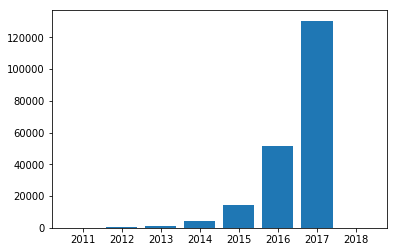

In [31]:
#year-frequency
plt.bar(train['year'].value_counts().index, train['year'].value_counts().values)

<BarContainer object of 12 artists>

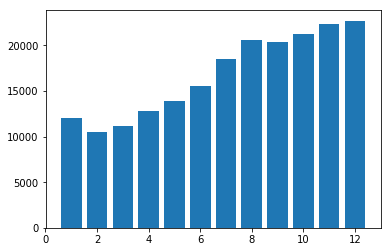

In [32]:
#month-frequency
plt.bar(train['month'].value_counts().index, train['month'].value_counts().values)

In [33]:
train['month'].value_counts()

12    22718
11    22403
10    21231
8     20552
9     20372
7     18490
6     15579
5     13953
4     12860
1     12050
3     11194
2     10515
Name: month, dtype: int64

In [34]:
train['year'].value_counts()

2017    130519
2016     51277
2015     14142
2014      4523
2013      1129
2012       282
2018        35
2011        10
Name: year, dtype: int64

In [35]:
#year - target mean
train.groupby(['year'])['target'].mean()

year
2011   -0.588494
2012   -1.243123
2013   -0.876205
2014   -0.768913
2015   -0.640495
2016   -0.573808
2017   -0.277227
2018    0.171504
Name: target, dtype: float64

In [36]:
all.head()

,card_id,feature_1,feature_2,feature_3,first_active_month,month,target,year
0,C_ID_92a2005557,5,2,1,2017-06,6.0,-0.820283,2017.0
1,C_ID_3d0044924f,4,1,0,2017-01,1.0,0.392913,2017.0
2,C_ID_d639edf6cd,2,2,0,2016-08,8.0,0.688056,2016.0
3,C_ID_186d6a6901,4,3,0,2017-09,9.0,0.142495,2017.0
4,C_ID_cdbd2c0db2,1,3,0,2017-11,11.0,-0.159749,2017.0


<BarContainer object of 8 artists>

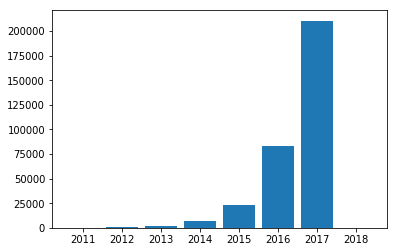

In [37]:
#year - frequency
plt.bar(all['year'].value_counts().index, all['year'].value_counts().values)

<BarContainer object of 12 artists>

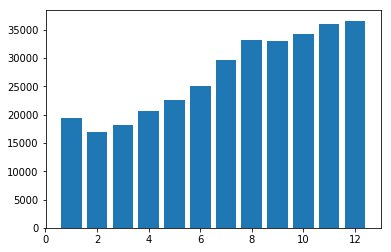

In [38]:
#month - frequency
plt.bar(all['month'].value_counts().index, all['month'].value_counts().values)

## feature_1

In [39]:
all['feature_1'].value_counts()

3    118292
2     89912
5     65676
4     32217
1     19443
Name: feature_1, dtype: int64

<BarContainer object of 5 artists>

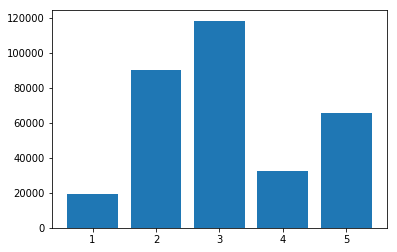

In [69]:
plt.bar(all['feature_1'].value_counts().index, all['feature_1'].value_counts().values)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b200ba1828>,
 'caps': [<matplotlib.lines.Line2D at 0x2b200baa128>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b200ba16d8>],
 'medians': [<matplotlib.lines.Line2D at 0x2b200baa978>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b200baada0>],
 'means': []}

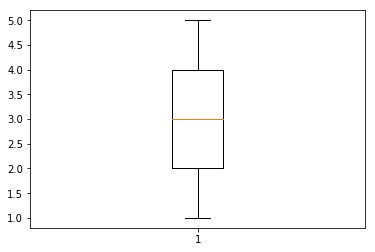

In [65]:
plt.boxplot(all['feature_1'])

## feature_2

In [66]:
all['feature_2'].value_counts()

1    144017
2    120832
3     60691
Name: feature_2, dtype: int64

<BarContainer object of 3 artists>

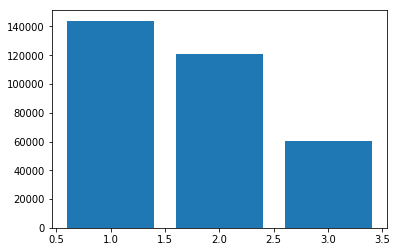

In [70]:
plt.bar(all['feature_2'].value_counts().index, all['feature_2'].value_counts().values)

## feature_3

In [72]:
all['feature_3'].value_counts()

1    183968
0    141572
Name: feature_3, dtype: int64

<BarContainer object of 2 artists>

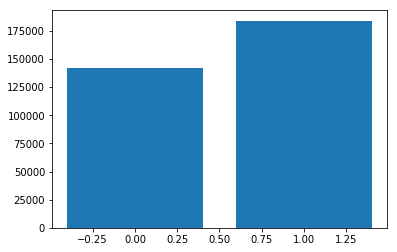

In [73]:
plt.bar(all['feature_3'].value_counts().index, all['feature_3'].value_counts().values)

## target

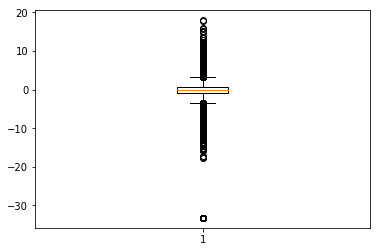

In [41]:
plt.boxplot(train['target'])
plt.show()

In [42]:
train['target'].quantile([0,0.25,0.5,0.75,1])

0.00   -33.219281
0.25    -0.883110
0.50    -0.023437
0.75     0.765453
1.00    17.965068
Name: target, dtype: float64

(array([2.20700e+03, 0.00000e+00, 0.00000e+00, 2.50000e+01, 2.32000e+02,
        1.21730e+04, 1.76382e+05, 1.07190e+04, 1.65000e+02, 1.40000e+01]),
 array([-33.21928095, -28.10084601, -22.98241108, -17.86397614,
        -12.74554121,  -7.62710627,  -2.50867134,   2.6097636 ,
          7.72819853,  12.84663346,  17.9650684 ]),
 <a list of 10 Patch objects>)

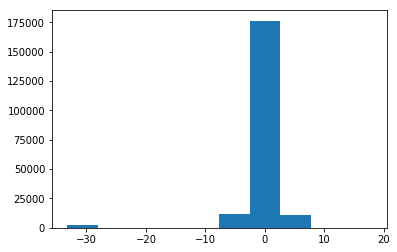

In [43]:
plt.hist(train['target'])

##### outlier가 꽤 많아보이지만, 일단 -33보다 작은 것들만 살펴봄

In [52]:
train.loc[train['target'] < -33,'year'].value_counts()

2017    996
2016    816
2015    254
2014    105
2013     25
2012     11
Name: year, dtype: int64

<BarContainer object of 12 artists>

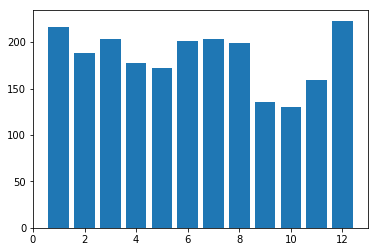

In [55]:
#연초에 많이 분포되어 있음
plt.bar(train.loc[train['target'] < -33,'month'].value_counts().index, train.loc[train['target'] < -33,'month'].value_counts().values)

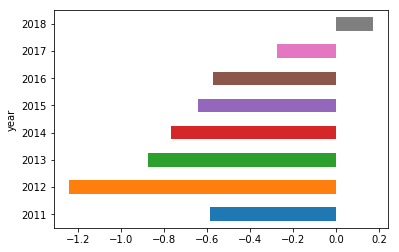

In [62]:
#연도별 target 평균
train.groupby(['year'])['target'].mean().plot('barh')

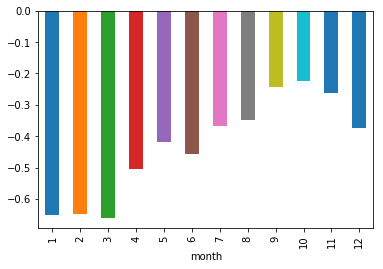

In [64]:
#월별 target 평균
train.groupby(['month'])['target'].mean().plot('bar')

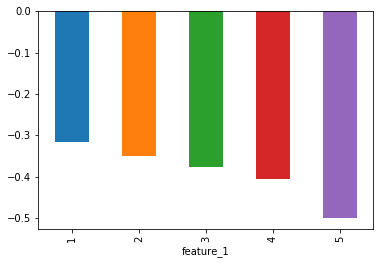

In [80]:
#feature1별 target 평균
train.groupby(['feature_1'])['target'].mean().plot('bar')

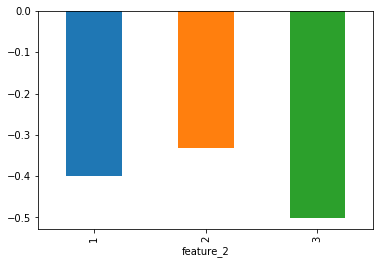

In [81]:
#feature2별 target 평균
train.groupby(['feature_2'])['target'].mean().plot('bar')

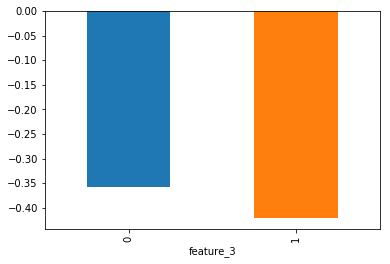

In [82]:
#feature3별 target 평균
train.groupby(['feature_3'])['target'].mean().plot('bar')